In [19]:
"""Import a training set and train the network
Then import a test set and try the network on it
"""
import math
import os
from sklearn import linear_model

os.chdir("/Users/liutianlin/Desktop/Academics/MINDS/neuromorphic")

import numpy as np
from matplotlib import pyplot as plt
import h5py
import DYNAPSETools.dynapseSpikesFitter as fitter

folderName = "/Users/liutianlin/Desktop/Academics/MINDS/neuromorphic/caer/myoutputs/thesis_output_aedat/"


plt.close('all')

trainFileList = ['baselineBias_classificationRes_classification', 'classificationBias_slowClassificationRes_classification' ]



acc_dict = {}
target_dict = {}
timeScale_dict= {}
prediction_dict = {}
      


In [20]:


# ======================================== TRAINING
# Import training data from dataset

for this_trainFile in trainFileList:
    trainDataset = this_trainFile + '.hdf5'
    testDataset = trainDataset

    fileName = os.path.join(folderName, trainDataset)
    h5f = h5py.File(fileName, "r")
    importedData = h5f["data"][:]
    importedTarget = h5f["target"][:]
    h5f.close()

    # Merge together all data (for linear regression)
    data = np.concatenate(importedData, axis = 1)
    target = np.concatenate(importedTarget, axis = 1)

    # carry out linear regression
    regr = linear_model.Ridge(alpha = 0)

    regr.fit(data.T, target.T)
    coefficients = regr.coef_



    #%%
    # ======================================== TESTING
    # Import test data from dataset
    fileName = os.path.join(folderName, testDataset)
    h5f = h5py.File(fileName, "r")
    importedData = h5f["data"][:]
    importedTarget = h5f["target"][:]
    h5f.close()

    # Merge together all test data
    data = np.concatenate(importedData, axis = 1)
    target = np.concatenate(importedTarget, axis = 1)

    # Make prediction
    #prediction = fitter.pseudo_inv_prevision(coefficients = coefficients, matrix =  data)
    prediction = fitter.sklearn_prevision(regr = regr, matrix = data)

    ## Transform target to shape (time step, neuron)
    target = target.T

    timeScale = np.arange(np.shape(data)[1])
    rights, wrongs = fitter.prediction_performances(prediction = prediction, target = target, firingRateThreshold = 0.5)

    acc_dict[this_trainFile] = round(rights / len(prediction) * 100,2)
    print("Performance: {:f}".format(acc_dict[this_trainFile]))


    target_dict[this_trainFile] = target
    timeScale_dict[this_trainFile] = timeScale
    prediction_dict[this_trainFile] = prediction 

          

Performance: 94.330000
Performance: 99.830000


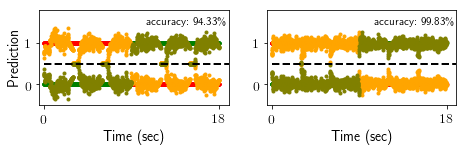

In [27]:

plt.rc('text', usetex=True)
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.rc('axes', labelsize=14)

# plt.rcParams.update({'font.size': 22})
width = 6.37
height = width / 1.618 / 2

fig = plt.figure()
# fig.subplots_adjust(left=.06, bottom=.16, right=.99, top=.97)
ax1 = fig.add_subplot(121)
# _, ax1, handles = fitter.prediction_plot(timeScale = timeScale, prediction = prediction, target = target)
handles = []
handle = ax1.plot(timeScale_dict[trainFileList[0]] * 0.01 , target_dict[trainFileList[0]],  linestyle = 'None', marker = 'o',markersize = 3)
handles.append(handle)
handle = ax1.plot(timeScale_dict[trainFileList[0]] * 0.01 , prediction_dict[trainFileList[0]], linestyle = 'None', marker = 'o',markersize = 3)
handles.append(handle)
handles[0][0].set_color("red")
handles[1][0].set_color("orange")
handles[0][1].set_color("green")
handles[1][1].set_color("olive")
ax1.plot([timeScale_dict[trainFileList[0]][0] * 0.01, timeScale_dict[trainFileList[0]][-1]], [0.5, 0.5], "k--", lw=2)
ax1.set_ylim([-0.5,1.8])
ax1.set_xlim([-0.5,19])
ax1.set_xticks([0, 18])
ax1.text(10.5, 1.45, 'accuracy: ' + str(acc_dict[trainFileList[0]]) + '\%', fontsize=11)
ax1.set_xlabel('Time (sec)')
ax1.set_ylabel('Prediction')




ax2 = fig.add_subplot(122)
handles = []
handle = ax2.plot(timeScale_dict[trainFileList[1]] * 0.01 , target_dict[trainFileList[1]],  linestyle = 'None', marker = 'o',markersize = 3)
handles.append(handle)

handle = ax2.plot(timeScale_dict[trainFileList[1]] * 0.01, prediction_dict[trainFileList[1]], linestyle = 'None', marker = 'o',markersize = 3)
handles.append(handle)
handles[0][0].set_color("red")
handles[1][0].set_color("orange")
handles[0][1].set_color("green")
handles[1][1].set_color("olive")
ax2.plot([timeScale_dict[trainFileList[1]][0] * 0.01 , timeScale_dict[trainFileList[1]][-1]], [0.5, 0.5], "k--", lw=2)
ax2.text(10.5, 1.45, 'accuracy: ' + str(acc_dict[trainFileList[1]]) + '\%', fontsize=11)
ax2.set_ylim([-0.5,1.8])
ax2.set_xlim([-0.5,19])
ax2.set_xticks([0, 18])
ax2.set_xlabel('Time (sec)')


fig.set_size_inches(width, height)
fig.subplots_adjust(left=.08, bottom=.05, right=.99, top=.97)

plt.subplots_adjust(bottom = 0.3, wspace=0.2)
plt.gcf().savefig('/Users/liutianlin/Desktop/Academics/MSc_thesis/my_msc_thesis/figs/thesis_classification.png', dpi=1200)


plt.show()





In [15]:
'accuracy: ' + str(acc_dict[trainFileList[1]]) + '%'

'accuracy: 99.83%'